<a href="https://colab.research.google.com/github/SusanSagwa/Deep-Forward-Networks/blob/main/Deep_Feed_Forward_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

In [ ]:
# import NN layers and other componenets.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers

In [ ]:
# Tensorflow untils packages.
#import tensorflow_docs as tfdocs
#import tensorflow_docs.plots
#import tensorflow_docs.modeling

In [ ]:
import pathlib # for processing a path e.g., c:\documents\files\test_ds.csv
import matplotlib.pyplot as plt # for plotting data and creating different charts.
import numpy as np # for math and arrays
import pandas as pd # data from for the data.
import seaborn as sns # for plotting.

In [ ]:
tf.random.set_seed(13) # to make sure the experiment is reproducible.
tf.debugging.set_log_device_placement(False)

In [ ]:
all_ds = pd.read_csv('Nairobi Office Price Ex.csv')

In [ ]:
all_dis = all_ds.iloc[0:13, 8:10]
all_dis

,SIZE,PRICE
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
5,55.142188,78.211518
6,52.211797,79.641973
7,39.299567,59.171489
8,48.105042,75.331242
9,52.550014,71.300880


In [ ]:
print(f'Number of rows/examples and columns in the dataset: {all_dis.shape}')

Number of rows/examples and columns in the dataset: (13, 2)


In [ ]:
# Summary of information on the dataset.
all_dis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SIZE    13 non-null     float64
 1   PRICE   13 non-null     float64
dtypes: float64(2)
memory usage: 336.0 bytes


**Cleaning the Data**

In [ ]:
print("Display NA values in each columns: ")
all_dis.isna().sum(axis=0)

Display NA values in each columns: 


SIZE     0
PRICE    0
dtype: int64

In [ ]:
print("Display NA values in each row: ")
all_dis.isna().sum(axis=1)

Display NA values in each row: 


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [ ]:
print("Display NULL values in each columns: ")
all_dis.isnull().sum()

Display NULL values in each columns: 


SIZE     0
PRICE    0
dtype: int64

In [ ]:
print("Display NULL values in each row: ")
all_dis.isnull().sum(1)

Display NULL values in each row: 


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [ ]:
# Remove the rows with NA values.
all_dis = all_dis.dropna()

In [ ]:
# slice the data set and keep last n rows of the dataset.  E.g., you want to save the last 5 rows from the dataset into a new dataset.
n = 5
temp_ds = all_dis[:n]
temp_ds.shape

(5, 2)

**Sample the dataset randomly and return fraction (e.g., frac=50% will return 50% of the data) from the dataset.**

In [ ]:
all_dis = all_dis.sample(frac=1) # This will randomly shuffle the rows to make sure the data is not sorted. (if the data is sorted then we may end up with test dataset from one or two classes only)
all_dis_90pct = all_dis.sample(frac=0.9) # randomly sample the dataset and keep 90% of the rows.
all_dis_90pct.shape

(12, 2)

**Split the data into train/test splits.**

In [ ]:
# Split the data into 60% train and 40% test (later will divide the test to test and validate.)
train_dataset, temp_test_dataset =  train_test_split(all_dis_90pct, test_size=0.4)

print( train_dataset.shape )
print( temp_test_dataset.shape )

(7, 2)
(5, 2)


In [ ]:
# Split the test_dataset dataframe to 50% test and 50% validation. [this will divide the dataset into 60% train, 20% validate, and 20% test]
test_dataset, valid_dataset =  train_test_split(temp_test_dataset, test_size=0.5)
print( test_dataset.shape )
print( valid_dataset.shape )

(2, 2)
(3, 2)


In [ ]:
print(f"Display the datatype of the test_dataset: {type(test_dataset)}")
print(f" Train dataset       : {train_dataset.shape}")
print(f" Test dataset       : {test_dataset.shape}")
print(f" Validation dataset : {valid_dataset.shape}")

Display the datatype of the test_dataset: <class 'pandas.core.frame.DataFrame'>
 Train dataset       : (7, 2)
 Test dataset       : (2, 2)
 Validation dataset : (3, 2)


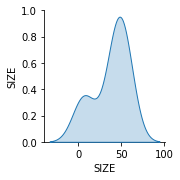

In [ ]:
# Plot the relationship between each two variables to spot anything incorrect.
train_stats = train_dataset.describe()
train_stats.pop('PRICE')
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde") # or diag_kind='reg'

In [ ]:
# Statistics on the train dataset to make sure it is in a good shape. (you may display the same stat for test and validate)
train_stats = train_dataset.describe()
train_stats.pop('PRICE')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
SIZE,7.0,48.25274,5.698451,39.299567,44.79189,48.105042,52.8193,55.142188


The label is "PRICE" of the housing pricing. We will remove them from each dataset split (train, test, validate) and save them into new variables.
Note: we maintain the order of the labels and data from now on to make sure each example/row is associated with the right label.

In [ ]:
train_labels = train_dataset.pop('PRICE')
test_labels = test_dataset.pop('PRICE')
valid_labels = valid_dataset.pop('PRICE')

Data Normalization/Scaling
Subtract the mean of the training data and divide by the standard deviation of the training data. 

In [ ]:
# define a function to normalize the data set.
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_valid_dataset = norm(valid_dataset)

In [ ]:
print(r'Train/Test/Validate splits: ')
print(f'Train    : {normed_train_data.shape} ')
print(f'Test     : {normed_test_data.shape} ')
print(f'Validate : {normed_valid_dataset.shape} ')

print(r'Train/Test/Validate labels: ')
print(f'Train Labels : {train_labels.shape} ')
print(f'Test Labels  : {test_labels.shape} ')
print(f'Test Labels  : {valid_labels.shape} ')

Train/Test/Validate splits: 
Train    : (7, 1) 
Test     : (2, 1) 
Validate : (3, 1) 
Train/Test/Validate labels: 
Train Labels : (7,) 
Test Labels  : (2,) 
Test Labels  : (3,) 


In [ ]:
# show the data after normalized
normed_train_data

,SIZE
6,0.694760
12,-0.717509
5,1.209004
8,-0.025919
1,0.907977
7,-1.571159
10,-0.497154


Build a Neural Network Model

In [ ]:
# We decalred a function for creating a model.
def build_model1_two_hidden_layers():
    # Keras model object created from Sequential class. This will be the container that contains all layers.
    model = Sequential()

    # The model so far is empty. It can be constructed by adding layers and compilation.
    # This Keras model with multiple hidden layers.
    
    # Input Layer with 2 Neurons
    model.add(Dense(2, input_shape = (normed_train_data.shape[1],)))    # Input layer => input_shape must be explicitly designated

    
    model.add(Dense(3,Activation('tanh')))                         # Hidden layer 1 => only output dimension should be designated (output dimension = # of Neurons = 3)
    
    
    model.add(Dense(4, Activation('tanh')))                         # Hidden layer 2 => only output dimension should be designated (output dimension = # of Neurons = 4)
    
    
    model.add(Dense(1))                          # Output layer => output dimension = 1 since it is a regression problem
    
    learning_rate = 0.001
    optimizer = optimizers.RMSprop(learning_rate)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', 'mape']) # for regression problems, mean squared error (MSE) is often employed
    
    return model

In [ ]:
model = build_model1_two_hidden_layers()
print('Here is a summary of this model: ')
model.summary()

Here is a summary of this model: 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 4         
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
 dense_2 (Dense)             (None, 4)                 16        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Test the model before training (this will use the initial weights.) which in fact will generate random values.
example_batch = normed_train_data[:3] # take the first 3 data points from the training data.
#example_result = tf.convert_to_tensor(example_batch, dtype=tf.int64) 
example_result = model.predict(example_batch)
example_result

array([[ 0.46616495],
       [-0.47710803],
       [ 0.6472541 ]], dtype=float32)

Save checkpoints during training

In [ ]:
checkpoint_path = r".\models\house_prediction.ckpt"

# Create a callback that saves the model's weights
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 monitor='val_loss', # or val_accuracy if you have it.
                                                 save_best_only=True, # Default false. If you don't change the file name then the output will be overritten at each step and only the last model will be saved.
                                                 save_weights_only=True, # True => model.save_weights (weights and no structure, you need JSON file for structure), False => model.save (saves weights & structure)
                                                 verbose=0,
                                                  )


Training the model we built above.

In [ ]:

EPOCHS = 10
batch_size = 2 

model = build_model1_two_hidden_layers()
print('Here is a summary of this model: ')
model.summary()


with tf.device('/CPU:0'): # it can be with '/CPU:0'
# with tf.device('/GPU:0'): # comment the previous line and uncomment this line to train with a GPU, if available.
    history = model.fit(
        normed_train_data, 
        train_labels,
        batch_size = batch_size,
        epochs=EPOCHS, 
        verbose=0,
        shuffle=True,
        steps_per_epoch = int(normed_train_data.shape[0] / batch_size) ,
        validation_data = (normed_valid_dataset, valid_labels),
        
    )

Here is a summary of this model: 
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 4         
                                                                 
 dense_5 (Dense)             (None, 3)                 9         
                                                                 
 dense_6 (Dense)             (None, 4)                 16        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

Summary of the results after each epoch: 


,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
0,4895.143066,69.351631,4895.143066,99.977058,5257.671387,72.048820,5257.671387,99.789268,0
1,4728.967773,68.218887,4728.967773,100.044083,5256.539062,72.041107,5256.539062,99.778679,1
2,4719.761719,68.140526,4719.761719,99.950066,5254.720703,72.028503,5254.720703,99.761024,2
3,4605.068359,67.285278,4605.068359,99.954063,5253.614746,72.020889,5253.614746,99.750450,3
4,4888.784668,69.306236,4888.784668,99.911186,5252.039062,72.009964,5252.039062,99.735130,4
5,4810.540527,68.938583,4810.540527,99.949707,5250.994629,72.002792,5250.994629,99.725197,5
6,4419.793945,65.672638,4419.793945,99.907043,5249.396973,71.991646,5249.396973,99.709480,6
7,4808.305664,68.922775,4808.305664,99.927071,5248.373047,71.984627,5248.373047,99.699768,7
8,4474.236328,66.375732,4474.236328,99.917290,5247.213867,71.976616,5247.213867,99.688599,8
9,4935.267090,69.741989,4935.267090,99.871155,5245.604980,71.965446,5245.604980,99.672935,9


See some of the model results

In [ ]:
# normed_train_data.pop('PRICE')
# Test the model after training.
example_batch = normed_train_data[:7]
example_result = model.predict(example_batch)
print('predicted values: ')
example_result

predicted values: 


array([[ 0.23604156],
       [-0.03342428],
       [ 0.29047447],
       [ 0.1055605 ],
       [ 0.26255506],
       [-0.13455947],
       [ 0.00726667]], dtype=float32)

In [ ]:
print('The ground truth: ')
train_labels[:7]

The ground truth: 


6     79.641973
12    62.008923
5     78.211518
8     75.331242
1     68.777596
7     59.171489
10    55.165677
Name: PRICE, dtype: float64